# Display timings
**Author: M.Ravasi**

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
df = pd.read_csv('Kirchhoff_Volve_timings.txt', sep="\t", header=None)
df.columns = ["Rank", "Time imaging", "Time overall"]

# Extrapolate time of single rank
time_rank = df["Time imaging"][0] * df["Rank"][0]
timeove_rank = df["Time overall"][0] * df["Rank"][0]

df2 = pd.DataFrame([[1, time_rank,  timeove_rank]], columns=["Rank", "Time imaging", "Time overall"])
df = pd.concat([df2, df])

df["Speedup"] = time_rank / df["Time imaging"] 
df["Speedup overall"] = timeove_rank / df["Time overall"] 
df

,Rank,Time imaging,Time overall,Speedup,Speedup overall
0,1,98.404,293.340,1.000000,1.000000
0,4,24.601,73.335,4.000000,4.000000
1,5,20.029,61.839,4.913076,4.743608
2,6,17.548,54.487,5.607705,5.383669
3,7,14.863,47.679,6.620736,6.152394
4,8,13.381,43.458,7.354009,6.749965
5,9,12.073,39.743,8.150750,7.380922
6,10,11.363,37.207,8.660037,7.884000
7,11,10.531,35.631,9.344222,8.232719
8,12,9.767,33.394,10.075151,8.784213


Text(0, 0.5, 'Speedup overall')

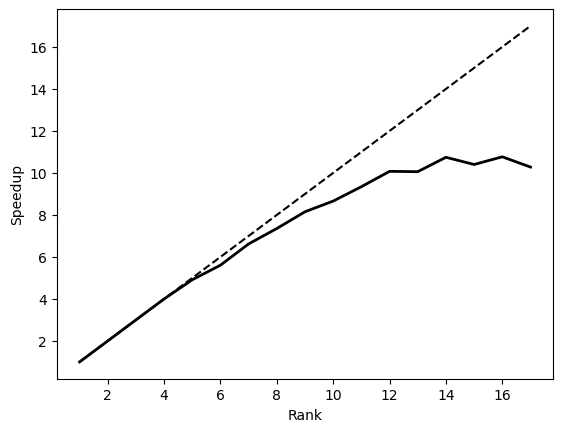

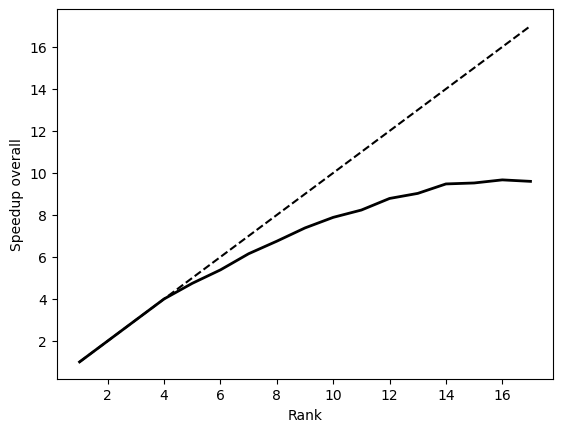

In [34]:
plt.figure()
plt.plot(df["Rank"], df["Speedup"], 'k', lw=2)
plt.plot([df["Rank"].values[0], df["Rank"].values[-1]],[df["Rank"].values[0], df["Rank"].values[-1]], '--k')
plt.xlabel('Rank')
plt.ylabel('Speedup')

plt.figure()
plt.plot(df["Rank"], df["Speedup overall"], 'k', lw=2)
plt.plot([df["Rank"].values[0], df["Rank"].values[-1]],[df["Rank"].values[0], df["Rank"].values[-1]], '--k')
plt.xlabel('Rank')
plt.ylabel('Speedup overall')